# IRIS: Custom training: walkthrough
- https://www.tensorflow.org/tutorials/customization/custom_training_walkthrough 



# 0. 환경 셋업

In [2]:
import os
import matplotlib.pyplot as plt

import tensorflow as tf

In [3]:
print("TensorFlow version: {}".format(tf.__version__))
print("Eager execution: {}".format(tf.executing_eagerly()))

TensorFlow version: 2.1.3
Eager execution: True


# 1. 데이터 준비

In [4]:
train_dataset_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv"

train_dataset_fp = tf.keras.utils.get_file(fname=os.path.basename(train_dataset_url),
                                           origin=train_dataset_url)

print("Local copy of the dataset file: {}".format(train_dataset_fp))

8192/2194 [================================================================================================================] - 0s 0us/step
Local copy of the dataset file: /home/ec2-user/.keras/datasets/iris_training.csv


In [5]:
train_dataset_fp

'/home/ec2-user/.keras/datasets/iris_training.csv'

In [6]:
# column order in CSV file
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

feature_names = column_names[:-1]
label_name = column_names[-1]

print("Features: {}".format(feature_names))
print("Label: {}".format(label_name))

Features: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Label: species


In [7]:
class_names = ['Iris setosa', 'Iris versicolor', 'Iris virginica']

In [19]:
batch_size =32

train_dataset = tf.data.experimental.make_csv_dataset(
    train_dataset_fp,
    batch_size,
    column_names = column_names,
    label_name = label_name,
    num_epochs=1
)

In [24]:
train_dataset

<PrefetchDataset shapes: (OrderedDict([(sepal_length, (None,)), (sepal_width, (None,)), (petal_length, (None,)), (petal_width, (None,))]), (None,)), types: (OrderedDict([(sepal_length, tf.float32), (sepal_width, tf.float32), (petal_length, tf.float32), (petal_width, tf.float32)]), tf.int32)>

In [20]:
features, labels = next(iter(train_dataset))
print(features)

OrderedDict([('sepal_length', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([5.7, 5.9, 7.2, 6.7, 5. , 4.4, 7.3, 6.1, 6.4, 6.7, 5.7, 5.1, 5.4,
       6.8, 6. , 6.5, 5. , 5.8, 4.8, 7. , 7.7, 7.7, 5.7, 5.6, 6.8, 5.8,
       4.7, 4.8, 4.9, 6.3, 6.3, 7.4], dtype=float32)>), ('sepal_width', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([2.8, 3.2, 3.2, 3.1, 3.5, 3.2, 2.9, 2.9, 2.7, 3.3, 2.8, 3.8, 3.9,
       3. , 3. , 3. , 2. , 2.8, 3. , 3.2, 2.8, 3.8, 3.8, 2.7, 2.8, 2.7,
       3.2, 3.4, 3.1, 3.4, 3.3, 2.8], dtype=float32)>), ('petal_length', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([4.5, 4.8, 6. , 5.6, 1.6, 1.3, 6.3, 4.7, 5.3, 5.7, 4.1, 1.6, 1.3,
       5.5, 4.8, 5.5, 3.5, 5.1, 1.4, 4.7, 6.7, 6.7, 1.7, 4.2, 4.8, 5.1,
       1.6, 1.6, 1.5, 5.6, 6. , 6.1], dtype=float32)>), ('petal_width', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([1.3, 1.8, 1.8, 2.4, 0.6, 0.2, 1.8, 1.4, 1.9, 2.1, 1.3, 0.2, 0.4,
       2.1, 1.8, 1.8, 1. , 2.4, 0.3, 1.4, 2. , 2.2, 0.3, 1.3,

In [21]:
print(labels)

tf.Tensor([1 1 2 2 0 0 2 1 2 2 1 0 0 2 2 2 1 2 0 1 2 2 0 1 1 2 0 0 0 2 2 2], shape=(32,), dtype=int32)


In [23]:
features.values()

odict_values([<tf.Tensor: shape=(32,), dtype=float32, numpy=
array([5.7, 5.9, 7.2, 6.7, 5. , 4.4, 7.3, 6.1, 6.4, 6.7, 5.7, 5.1, 5.4,
       6.8, 6. , 6.5, 5. , 5.8, 4.8, 7. , 7.7, 7.7, 5.7, 5.6, 6.8, 5.8,
       4.7, 4.8, 4.9, 6.3, 6.3, 7.4], dtype=float32)>, <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([2.8, 3.2, 3.2, 3.1, 3.5, 3.2, 2.9, 2.9, 2.7, 3.3, 2.8, 3.8, 3.9,
       3. , 3. , 3. , 2. , 2.8, 3. , 3.2, 2.8, 3.8, 3.8, 2.7, 2.8, 2.7,
       3.2, 3.4, 3.1, 3.4, 3.3, 2.8], dtype=float32)>, <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([4.5, 4.8, 6. , 5.6, 1.6, 1.3, 6.3, 4.7, 5.3, 5.7, 4.1, 1.6, 1.3,
       5.5, 4.8, 5.5, 3.5, 5.1, 1.4, 4.7, 6.7, 6.7, 1.7, 4.2, 4.8, 5.1,
       1.6, 1.6, 1.5, 5.6, 6. , 6.1], dtype=float32)>, <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([1.3, 1.8, 1.8, 2.4, 0.6, 0.2, 1.8, 1.4, 1.9, 2.1, 1.3, 0.2, 0.4,
       2.1, 1.8, 1.8, 1. , 2.4, 0.3, 1.4, 2. , 2.2, 0.3, 1.3, 1.4, 1.9,
       0.2, 0.2, 0.1, 2.4, 2.5, 1.9], dtype=float32)>])

In [25]:
def pack_features_vector(features, labels):
    features = tf.stack(list(features.values()), axis=1)
    return features, labels

In [26]:
train_dataset = train_dataset.map(pack_features_vector)
train_dataset

<MapDataset shapes: ((None, 4), (None,)), types: (tf.float32, tf.int32)>

In [27]:
features, labels = next(iter(train_dataset))
print(features[:5])

tf.Tensor(
[[4.8 3.4 1.6 0.2]
 [6.3 2.7 4.9 1.8]
 [5.6 2.9 3.6 1.3]
 [5.2 3.4 1.4 0.2]
 [5.  3.  1.6 0.2]], shape=(5, 4), dtype=float32)


# 2. 모델 정의

In [28]:
model = tf.keras.Sequential(
[
    tf.keras.layers.Dense(10, activation = tf.nn.relu, input_shape=(4,)),
    tf.keras.layers.Dense(10, activation = tf.nn.relu),
    tf.keras.layers.Dense(3)
    
]
)

In [29]:
predictions = model(features)
predictions[:5]

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[ 0.687112  ,  1.0574087 , -0.5857722 ],
       [ 1.3207401 ,  1.266968  , -0.07352187],
       [ 1.048143  ,  1.2074633 , -0.16892944],
       [ 0.5962111 ,  1.1039786 , -0.43161622],
       [ 0.6405841 ,  1.1052797 , -0.2814343 ]], dtype=float32)>

In [30]:
tf.nn.softmax(predictions[:5])

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[0.36654377, 0.5308156 , 0.10264063],
       [0.4554431 , 0.43159977, 0.11295718],
       [0.40505356, 0.47501177, 0.11993463],
       [0.3311959 , 0.5503077 , 0.11849642],
       [0.33453262, 0.53241855, 0.1330488 ]], dtype=float32)>

In [31]:
print("Prediction: {}".format(tf.argmax(predictions, axis=1)))
print("    Labels: {}".format(labels))

Prediction: [1 0 1 1 1 0 0 0 1 0 1 0 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 1 0]
    Labels: [0 2 1 0 0 2 2 1 0 1 1 2 0 2 2 2 0 0 1 1 0 2 2 0 2 2 0 2 2 2 0 2]


# 3. 모델 생성

## Loss 오브젝트 정의

In [34]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_object

In [35]:
def loss(model, x, y, training):
    y_ = model(x, training=training)
    return loss_object(y_true=y, y_pred=y_)

l = loss(model, features, labels, training=False)
print("Loss test: {}", format(l))

Loss test: {} 1.6159218549728394


## Gradient 생성 함수 정의

In [36]:
def grad(model, inputs, targets):
    with tf.GradientTape() as tape:
        loss_value = loss(model, inputs, targets, training=True)
        return loss_value, tape.gradient(loss_value, model.trainable_variables)

In [37]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

In [39]:
loss_value, grads = grad(model, features, labels)
print("Step: {}, Initial_Loss: {}".format(optimizer.iterations.numpy(), loss_value.numpy()))
optimizer.apply_gradients(zip(grads, model.trainable_variables))
print("Step: {}, Loss: {}".format(optimizer.iterations.numpy(), 
                                 loss(model, features, labels, training=True).numpy()))

Step: 0, Initial_Loss: 1.6159218549728394
Step: 1, Loss: 1.389014720916748


# 4. 모델 훈련

In [41]:
train_loss_results = []
train_accuracy_results = []
num_epochs = 201

for epoch in range(num_epochs):
    epoch_loss_avg = tf.keras.metrics.Mean()
    epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()
    
    for x, y in train_dataset:
        loss_value, grads = grad(model, x, y)
        optimizer.apply_gradients(zip(grads, model.trainable_variables))
        
        epoch_loss_avg.update_state(loss_value)
        epoch_accuracy.update_state(y, model(x, training=True))
        
    train_loss_results.append(epoch_loss_avg.result())
    train_accuracy_results.append(epoch_accuracy.result())
    
    if epoch % 50 == 0:
        print("Epoch {:03d} : Loss: {:.3f}".format(epoch,
                                                   epoch_loss_avg.result(),
                                                   epoch_accuracy.result()
                                                  ))

Epoch 000 : Loss: 1.085
Epoch 050 : Loss: 0.415
Epoch 100 : Loss: 0.253
Epoch 150 : Loss: 0.178
Epoch 200 : Loss: 0.141


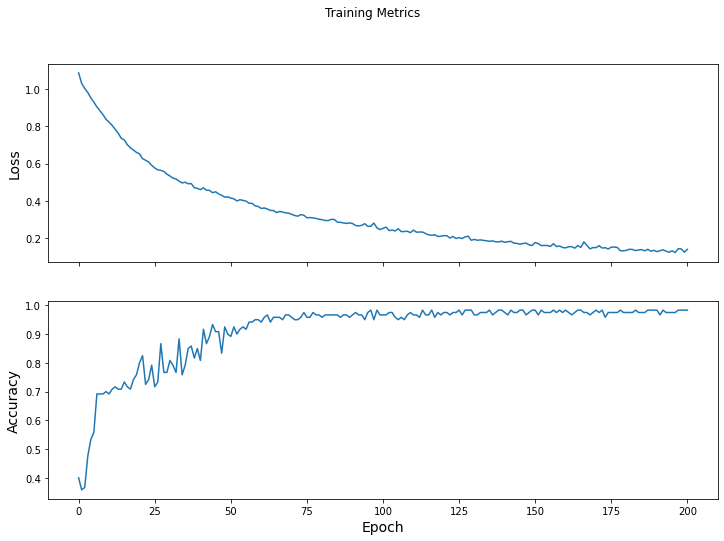

In [42]:
fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Training Metrics')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_accuracy_results)
plt.show()

# 5. 테스트 데이터 세트 준비

In [43]:
test_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv"

test_fp = tf.keras.utils.get_file(fname=os.path.basename(test_url),
                                  origin=test_url)

8192/573 [============================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 0us/step


In [44]:
test_dataset = tf.data.experimental.make_csv_dataset(
    test_fp,
    batch_size,
    column_names=column_names,
    label_name='species',
    num_epochs=1,
    shuffle=False)

test_dataset = test_dataset.map(pack_features_vector)

# 6. 테스트 데이터 세트 추론

In [45]:
test_accuracy = tf.keras.metrics.Accuracy()

for (x, y) in test_dataset:
  # training=False is needed only if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  logits = model(x, training=False)
  prediction = tf.argmax(logits, axis=1, output_type=tf.int32)
  test_accuracy(prediction, y)

print("Test set accuracy: {:.3%}".format(test_accuracy.result()))

Test set accuracy: 93.333%


In [46]:
tf.stack([y,prediction],axis=1)

<tf.Tensor: shape=(30, 2), dtype=int32, numpy=
array([[1, 1],
       [2, 2],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [2, 1],
       [1, 1],
       [2, 2],
       [2, 2],
       [0, 0],
       [2, 2],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [2, 2],
       [0, 0],
       [1, 1],
       [2, 2],
       [1, 2],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [2, 2],
       [1, 1]], dtype=int32)>

# 7. 임의 데이터 추론

In [47]:
predict_dataset = tf.convert_to_tensor([
    [5.1, 3.3, 1.7, 0.5,],
    [5.9, 3.0, 4.2, 1.5,],
    [6.9, 3.1, 5.4, 2.1]
])

# training=False is needed only if there are layers with different
# behavior during training versus inference (e.g. Dropout).
predictions = model(predict_dataset, training=False)

for i, logits in enumerate(predictions):
  class_idx = tf.argmax(logits).numpy()
  p = tf.nn.softmax(logits)[class_idx]
  name = class_names[class_idx]
  print("Example {} prediction: {} ({:4.1f}%)".format(i, name, 100*p))

Example 0 prediction: Iris setosa (98.3%)
Example 1 prediction: Iris versicolor (93.1%)
Example 2 prediction: Iris virginica (76.0%)
